In [ ]:
# Imports
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl # type: ignore
from tensorflow.python.framework import ops
from utils import *

%matplotlib inline
np.random.seed(1)

In [5]:
# Load Dataset
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_happy_dataset()

# Normalize the data
X_train = train_set_x_orig / 255
X_test = test_set_x_orig / 255

# Reshape the output (Y)
Y_train = train_set_y_orig.T
Y_test = test_set_y_orig.T

# Verify the changes
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


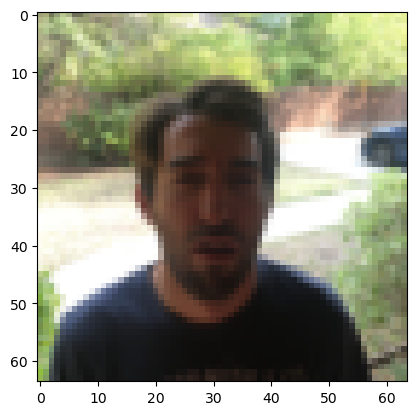

In [6]:
# Verify random data
index = 112
plt.imshow(train_set_x_orig[index])
plt.show()